# 전처리

In [1]:
file_name = 'data_eda+pp'

In [2]:
import pandas as pd
import numpy as np

import re
from tqdm import tqdm
import os
import shutil
from datetime import datetime

import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
cd '/opt/ml/data'

/opt/ml/data


In [4]:
eda_path = '/opt/ml/EDA/'

In [5]:
# 현재 시간
now = datetime.now()
current = now.strftime('-%Y-%m-%d')

In [6]:
# 작업 폴더 생성
folder_name = eda_path + file_name + current

if not os.path.exists(folder_name):
    os.makedirs(folder_name)

print(folder_name)

/opt/ml/EDA/data_eda+pp-2023-04-24


In [7]:
# 필요한 파일 위에서 생성한 폴더에 복사
copy_list = ['sample_submission.csv', 'test_ratings.csv', 'train_ratings.csv']

for file in copy_list:
    shutil.copy(eda_path + file, folder_name + '/' + file)

In [56]:
df_book = pd.read_csv('books.csv')
df_users = pd.read_csv('users.csv')

df_train = pd.read_csv('train_ratings.csv')

In [57]:
print(df_train.shape)
df_train.head()

(306795, 3)


,user_id,isbn,rating
0,8,0002005018,4
1,67544,0002005018,7
2,123629,0002005018,8
3,200273,0002005018,8
4,210926,0002005018,9


In [58]:
print(df_book.shape)
df_book.head()

(149570, 10)


,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
1,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,en,['1940-1949'],"Here, for the first time in paperback, is an o...",images/0060973129.01.THUMBZZZ.jpg
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,en,['Medical'],"Describes the great flu epidemic of 1918, an o...",images/0374157065.01.THUMBZZZ.jpg
3,0399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,en,['Fiction'],A Chinese immigrant who is convinced she is dy...,images/0399135782.01.THUMBZZZ.jpg
4,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,en,['History'],"Essays by respected military historians, inclu...",images/0425176428.01.THUMBZZZ.jpg


In [59]:
print(df_users.shape)
df_users.head()

(68092, 3)


,user_id,location,age
0,8,"timmins, ontario, canada",NaN
1,11400,"ottawa, ontario, canada",49.0
2,11676,"n/a, n/a, n/a",NaN
3,67544,"toronto, ontario, canada",30.0
4,85526,"victoria, british columbia, canada",36.0


# 1. `string` 타입 열 전처리
    
    - 띄어쓰기, 필요없는 기호 제거 등

In [81]:
def text_preprocessing(text):
    text = re.sub("[.,\'\"''""!?]", "", text)
    text = re.sub("[^0-9a-zA-Z\\s]", " ", text)
    text = re.sub("\s+", " ", text)
    text = text.lower()
    text = text.strip()
    return text

## 1.1 Book

In [82]:
book = df_book.copy()

In [83]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149570 entries, 0 to 149569
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   isbn                 149570 non-null  object 
 1   book_title           149570 non-null  object 
 2   book_author          149569 non-null  object 
 3   year_of_publication  149570 non-null  float64
 4   publisher            149570 non-null  object 
 5   img_url              149570 non-null  object 
 6   language             82343 non-null   object 
 7   category             80719 non-null   object 
 8   summary              82343 non-null   object 
 9   img_path             149570 non-null  object 
dtypes: float64(1), object(9)
memory usage: 11.4+ MB


In [84]:
str_list_b = ['book_title', 'book_author', 'publisher', 'language', 'category', 'summary']

for i in tqdm(range(len(book.index))):
    for col in str_list_b:
        if book.loc[i, col] is not np.nan:
            book.loc[i, col] = text_preprocessing(book.loc[i, col])
            book.loc[i, col] = book.loc[i, col].strip()

100%|██████████| 149570/149570 [36:04<00:00, 69.09it/s] 


## 1.2 User

In [152]:
user = df_users.copy()

### 1.2.1  `location`을 city, state, country로 분리

In [153]:
def seperate_location(sen):
    loc_sen = sen.split(',')
    city = loc_sen[0].strip()
    state = loc_sen[1].strip()
    country = loc_sen[2].strip()
    return city, state, country

In [154]:
user[['city', 'state', 'country']] = user.apply(lambda x : seperate_location(x['location']), axis=1, result_type='expand')

In [155]:
user = user.drop('location', axis=1)
user

,user_id,age,city,state,country
0,8,NaN,timmins,ontario,canada
1,11400,49.0,ottawa,ontario,canada
2,11676,NaN,n/a,n/a,n/a
3,67544,30.0,toronto,ontario,canada
4,85526,36.0,victoria,british columbia,canada
...,...,...,...,...,...
68087,278376,54.0,danville,pennsylvania,usa
68088,278621,74.0,victoria,delaware,canada
68089,278636,NaN,irvington,alabama,usa
68090,278659,33.0,vancouver,washington,usa


### 1.2.2 text preprocessing

In [156]:
# 'n/a' 문자 들어있는 값 모두 null 처리
user.loc[user.city.str.count('n/a')>=1, 'city'] = np.nan
user.loc[user.state.str.count('n/a')>=1, 'state'] = np.nan
user.loc[user.country.str.count('n/a')>=1, 'country'] = np.nan

In [157]:
print(sum(user.city.str.count('n/a')==1))
print(sum(user.state.str.count('n/a')==1))
print(sum(user.country.str.count('n/a')==1))

0
0
0


In [158]:
str_list_u = ['city', 'state', 'country']

for i in tqdm(range(len(user.index))):
    for col in str_list_u:
        if user.loc[i, col] is not np.nan:
            user.loc[i, col] = text_preprocessing(user.loc[i, col])
            user.loc[i, col] = user.loc[i, col].strip()

100%|██████████| 68092/68092 [00:39<00:00, 1725.91it/s]


In [159]:
user.loc[user['city']=='', 'city'] = np.nan
user.loc[user['state']=='', 'state'] = np.nan
user.loc[user['country']=='', 'country'] = np.nan

In [160]:
user

,user_id,age,city,state,country
0,8,NaN,timmins,ontario,canada
1,11400,49.0,ottawa,ontario,canada
2,11676,NaN,NaN,NaN,NaN
3,67544,30.0,toronto,ontario,canada
4,85526,36.0,victoria,british columbia,canada
...,...,...,...,...,...
68087,278376,54.0,danville,pennsylvania,usa
68088,278621,74.0,victoria,delaware,canada
68089,278636,NaN,irvington,alabama,usa
68090,278659,33.0,vancouver,washington,usa


# 2. Books, Users, Train_ratings을 Merge

## 2.1 `location` 열 (merge 전에 작업)

In [161]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68092 entries, 0 to 68091
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  68092 non-null  int64  
 1   age      40259 non-null  float64
 2   city     67979 non-null  object 
 3   state    64857 non-null  object 
 4   country  65967 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.6+ MB


In [162]:
# 중복값, null 없는 location_df 생성
location_df = user[['city', 'state', 'country']]
location_df.drop_duplicates(inplace=True, ignore_index=True)
location_df.dropna(inplace=True, ignore_index=True)

location_df

/tmp/ipykernel_42328/3639127904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_df.drop_duplicates(inplace=True, ignore_index=True)
/tmp/ipykernel_42328/3639127904.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_df.dropna(inplace=True, ignore_index=True)


,city,state,country
0,timmins,ontario,canada
1,ottawa,ontario,canada
2,toronto,ontario,canada
3,victoria,british columbia,canada
4,kingston,ontario,canada
...,...,...,...
15802,copenhagen s,sj lland,denmark
15803,grasse,alpes maritimes,france
15804,na,manitoba,canada
15805,victoria,delaware,canada


### 2.1.1 state, country 둘 다 비어 있는 경우

In [163]:
location_df[location_df['city']==location_df.iloc[1, 0]]

,city,state,country
1,ottawa,ontario,canada
2709,ottawa,ontario,k1c7b1
6040,ottawa,illinois,usa
9453,ottawa,oregon,canada
13226,ottawa,kansas,usa


In [166]:
for i in tqdm(range(len(location_df.index))):
    user.loc[(user['city']==location_df.iloc[i, 0])&(user['state'].isnull())&(user['country'].isnull()), 'state'] \
                                = location_df[location_df['city']==location_df.iloc[i, 0]].value_counts().idxmax()[1]
    user.loc[(user['city']==location_df.iloc[i, 0])&(user['state'].isnull())&(user['country'].isnull()),'country'] \
                                = location_df[location_df['city']==location_df.iloc[i, 0]].value_counts().idxmax()[2]

100%|██████████| 15807/15807 [07:11<00:00, 36.66it/s]


### 2.1.2 country만 비어있는 경우

In [167]:
location_df.iloc[1, :]

city        ottawa
state      ontario
country     canada
Name: 1, dtype: object

In [168]:
# city, state 모두 같을 때 가장 많이 나오는 나라로 대체
for i in tqdm(range(len(location_df.index))):
    user.loc[(user['city']==location_df.iloc[i, 0])&(user['state']==location_df.iloc[i, 1])&(user['country'].isnull()), 'country'] \
                        = location_df[(location_df['city']==location_df.iloc[i, 0])&(location_df['state']==location_df.iloc[i, 1])].value_counts().idxmax()[2]

100%|██████████| 15807/15807 [04:29<00:00, 58.62it/s]


In [171]:
# state 같을 때 가장 많이 나오는 나라로 대체
for i in tqdm(range(len(location_df.index))):
    user.loc[(user['state']==location_df.iloc[i, 1])&(user['country'].isnull()), 'country'] \
                        = location_df.loc[location_df['state']==location_df.iloc[i, 1], 'country'].value_counts().index[0]

100%|██████████| 15807/15807 [02:34<00:00, 102.32it/s]


In [172]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68092 entries, 0 to 68091
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  68092 non-null  int64  
 1   age      40259 non-null  float64
 2   city     67979 non-null  object 
 3   state    66234 non-null  object 
 4   country  67947 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.6+ MB


### 2.1.3 state 비어있는 경우

In [175]:
# city, country 같을 때 가장 많이 나오는 state로 대체
for i in tqdm(range(len(location_df.index))):
    user.loc[(user['city']==location_df.iloc[i, 0])&(user['country']==location_df.iloc[i, 2])&(user['state'].isnull()), 'state'] \
                        = location_df[(location_df['city']==location_df.iloc[i, 0])&(location_df['country']==location_df.iloc[i, 2])].value_counts().idxmax()[1]

100%|██████████| 15807/15807 [04:38<00:00, 56.68it/s]


In [177]:
user.dropna(subset=['city', 'state', 'country'], ignore_index=True, inplace=True)
print(user.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67442 entries, 0 to 67441
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  67442 non-null  int64  
 1   age      39889 non-null  float64
 2   city     67442 non-null  object 
 3   state    67442 non-null  object 
 4   country  67442 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.6+ MB
None


In [181]:
print(user.shape)
user.head(5)

(67442, 5)


,user_id,age,city,state,country
0,8,NaN,timmins,ontario,canada
1,11400,49.0,ottawa,ontario,canada
2,67544,30.0,toronto,ontario,canada
3,85526,36.0,victoria,british columbia,canada
4,96054,29.0,ottawa,ontario,canada


## 2.2 `age` 열

users, books, ratings 비로소 병합

In [180]:
df = df_train.merge(book, on='isbn')
total = user.merge(df, on='user_id')

print('df_total shape : ', total.shape)
total.head(5)

df_total shape :  (298194, 16)


,user_id,age,city,state,country,isbn,rating,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
0,8,NaN,timmins,ontario,canada,0002005018,4,clara callan,richard bruce wright,2001.0,harperflamingo canada,http://images.amazon.com/images/P/0002005018.0...,en,actresses,in a small town in canada clara callan relucta...,images/0002005018.01.THUMBZZZ.jpg
1,8,NaN,timmins,ontario,canada,074322678X,4,where youll find me and other stories,ann beattie,2002.0,scribner,http://images.amazon.com/images/P/074322678X.0...,en,fiction,now back in print ann beattie 39 s finest shor...,images/074322678X.01.THUMBZZZ.jpg
2,8,NaN,timmins,ontario,canada,0887841740,2,the middle stories,sheila heti,2004.0,house of anansi press,http://images.amazon.com/images/P/0887841740.0...,NaN,NaN,NaN,images/0887841740.01.THUMBZZZ.jpg
3,8,NaN,timmins,ontario,canada,1552041778,2,jane doe,r j kaiser,1999.0,mira books,http://images.amazon.com/images/P/1552041778.0...,NaN,NaN,NaN,images/1552041778.01.THUMBZZZ.jpg
4,8,NaN,timmins,ontario,canada,1567407781,6,the witchfinder amos walker mystery series,loren d estleman,1998.0,brilliance audio trade,http://images.amazon.com/images/P/1567407781.0...,NaN,NaN,NaN,images/1567407781.01.THUMBZZZ.jpg


In [182]:
total.to_csv(folder_name + '/' + 'total.csv', index=False)

In [183]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298194 entries, 0 to 298193
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              298194 non-null  int64  
 1   age                  212055 non-null  float64
 2   city                 298194 non-null  object 
 3   state                298194 non-null  object 
 4   country              298194 non-null  object 
 5   isbn                 298194 non-null  object 
 6   rating               298194 non-null  int64  
 7   book_title           298194 non-null  object 
 8   book_author          298193 non-null  object 
 9   year_of_publication  298194 non-null  float64
 10  publisher            298194 non-null  object 
 11  img_url              298194 non-null  object 
 12  language             182621 non-null  object 
 13  category             180563 non-null  object 
 14  summary              182621 non-null  object 
 15  img_path         

In [184]:
total.isnull().sum()

user_id                     0
age                     86139
city                        0
state                       0
country                     0
isbn                        0
rating                      0
book_title                  0
book_author                 1
year_of_publication         0
publisher                   0
img_url                     0
language               115573
category               117631
summary                115573
img_path                    0
dtype: int64

### 2.2.1 age 평균 표준편차가 가장 적은 2개의 열

In [188]:
std_result = {}

for col1 in tqdm(total.columns):
    if col1 in ['user_id', 'age', 'rating']:
        continue
    for col2 in total.columns: 
        if col2 in ['user_id', 'age', 'rating']:
            continue
        std_result[col1+' '+col2] = total.groupby([col1, col2])['age'].std().mean()
    print("(예시) column1: {:<20} {:<10} column2: {:<20} {:<10} mean of std: {:<20}".format(col1, total[col1].count(), col2, total[col2].count(), total.groupby([col1, col2])['age'].std().mean()))

 19%|█▉        | 3/16 [00:02<00:10,  1.27it/s]

(예시) column1: city                 298194     column2: img_path             298194     mean of std: 7.232237327230334   


 25%|██▌       | 4/16 [00:04<00:14,  1.23s/it]

(예시) column1: state                298194     column2: img_path             298194     mean of std: 8.789005535147341   


 31%|███▏      | 5/16 [00:06<00:16,  1.48s/it]

(예시) column1: country              298194     column2: img_path             298194     mean of std: 9.030620714352173   


 38%|███▊      | 6/16 [00:10<00:22,  2.29s/it]

(예시) column1: isbn                 298194     column2: img_path             298194     mean of std: 9.134554711009022   


 50%|█████     | 8/16 [00:15<00:19,  2.40s/it]

(예시) column1: book_title           298194     column2: img_path             298194     mean of std: 9.134554711009024   


 56%|█████▋    | 9/16 [00:19<00:18,  2.65s/it]

(예시) column1: book_author          298193     column2: img_path             298194     mean of std: 9.134554711009022   


 62%|██████▎   | 10/16 [00:20<00:14,  2.41s/it]

(예시) column1: year_of_publication  298194     column2: img_path             298194     mean of std: 9.134554711009024   


 69%|██████▉   | 11/16 [00:23<00:12,  2.48s/it]

(예시) column1: publisher            298194     column2: img_path             298194     mean of std: 9.13455471100902    


 75%|███████▌  | 12/16 [00:28<00:12,  3.12s/it]

(예시) column1: img_url              298194     column2: img_path             298194     mean of std: 9.134554711009022   


 81%|████████▏ | 13/16 [00:30<00:08,  2.83s/it]

(예시) column1: language             182621     column2: img_path             298194     mean of std: 9.289742290058875   


 88%|████████▊ | 14/16 [00:32<00:05,  2.66s/it]

(예시) column1: category             180563     column2: img_path             298194     mean of std: 9.31308428641775    


 94%|█████████▍| 15/16 [00:35<00:02,  2.87s/it]

(예시) column1: summary              182621     column2: img_path             298194     mean of std: 9.289742290058875   


100%|██████████| 16/16 [00:40<00:00,  2.51s/it]

(예시) column1: img_path             298194     column2: img_path             298194     mean of std: 9.134554711009022   


In [187]:
print("최소 m-std의 col 조합: {}, 그 값: {}".format(min(std_result, key=std_result.get), min(std_result.values())))

최소 m-std의 col 조합: citybook_author, 그 값: 2.776609642698999


In [189]:
age = pd.DataFrame(total.groupby(['city', 'book_author'])['age'].mean())
age

age
city               book_author                  
03770 el verger    rich shapero             69.0
05680              fred whitehead            NaN
                   heather busch             NaN
10012              brian patrick odonoghue   NaN
1110 lynnwood blvd janet evanovich          48.0
...                                          ...
zwickau            hanswilhelm haefs         NaN
                   r l stine                14.0
                   saki                      NaN
zwijndrecht        sue grafton               NaN
zwingenberg        jakob arjouni            48.0

[232272 rows x 1 columns]

In [190]:
age.reset_index(inplace=True)
age

,city,book_author,age
0,03770 el verger,rich shapero,69.0
1,05680,fred whitehead,NaN
2,05680,heather busch,NaN
3,10012,brian patrick odonoghue,NaN
4,1110 lynnwood blvd,janet evanovich,48.0
...,...,...,...
232267,zwickau,hanswilhelm haefs,NaN
232268,zwickau,r l stine,14.0
232269,zwickau,saki,NaN
232270,zwijndrecht,sue grafton,NaN


In [191]:
for i in tqdm(range(len(age.index))):
    total.loc[(total['city']==age.iloc[i, 0])&(total['book_author']==age.iloc[i, 1])&(total['age'].isnull()), 'age'] = age.iloc[i, 2]

100%|██████████| 232272/232272 [3:26:12<00:00, 18.77it/s]  


In [192]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298194 entries, 0 to 298193
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              298194 non-null  int64  
 1   age                  222312 non-null  float64
 2   city                 298194 non-null  object 
 3   state                298194 non-null  object 
 4   country              298194 non-null  object 
 5   isbn                 298194 non-null  object 
 6   rating               298194 non-null  int64  
 7   book_title           298194 non-null  object 
 8   book_author          298193 non-null  object 
 9   year_of_publication  298194 non-null  float64
 10  publisher            298194 non-null  object 
 11  img_url              298194 non-null  object 
 12  language             182621 non-null  object 
 13  category             180563 non-null  object 
 14  summary              182621 non-null  object 
 15  img_path         

In [193]:
total.to_csv(folder_name + '/' + 'total_loc,age.csv', index=False)

### 2.2.2 age 분포 파악

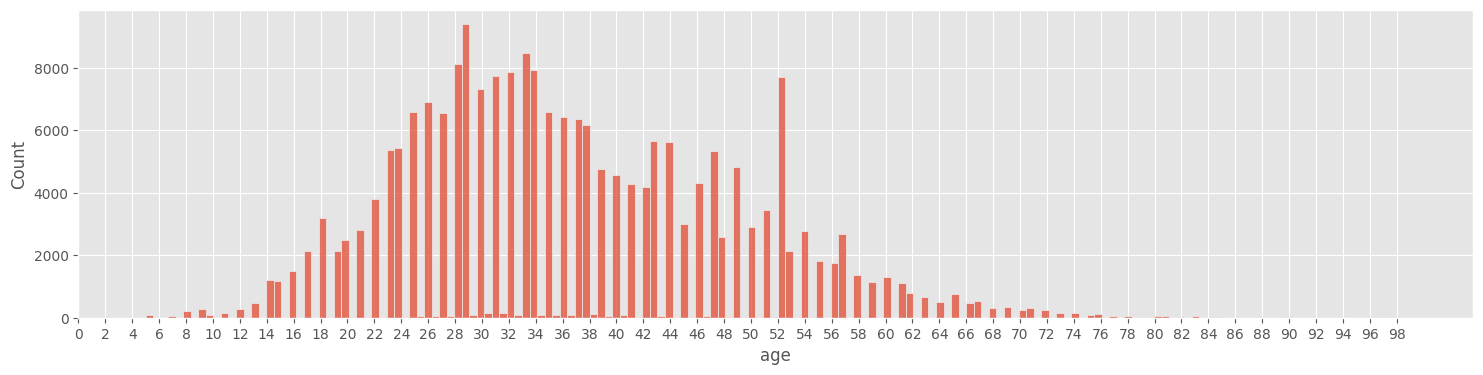

In [194]:
fig, ax = plt.subplots(figsize=(18, 4))

sns.histplot(total, x='age', ax=ax)
plt.xticks(np.arange(0, 100, 2))

plt.show()

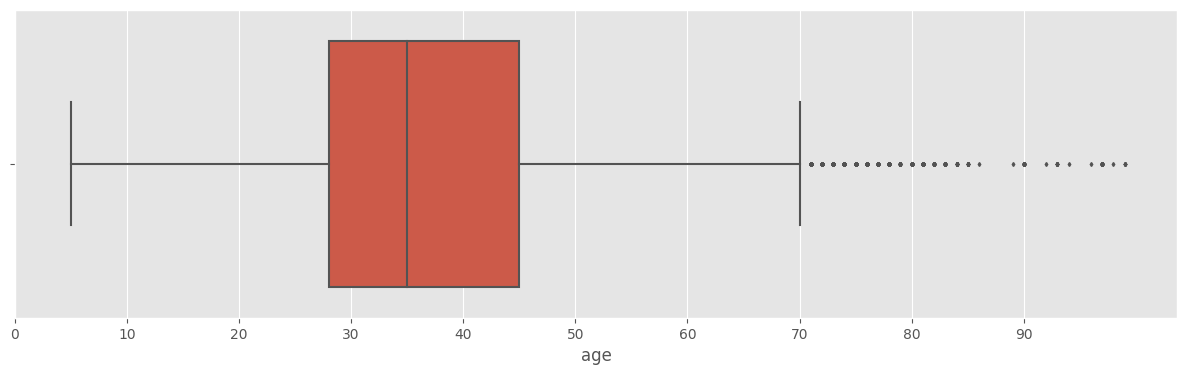

In [195]:
fig, ax = plt.subplots(figsize=(15, 4))

sns.boxplot(total, x='age', fliersize=2, ax=ax)
plt.xticks(np.arange(0, 100, 10))

plt.show()

In [196]:
total['age'].fillna(33, inplace=True)

In [197]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298194 entries, 0 to 298193
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              298194 non-null  int64  
 1   age                  298194 non-null  float64
 2   city                 298194 non-null  object 
 3   state                298194 non-null  object 
 4   country              298194 non-null  object 
 5   isbn                 298194 non-null  object 
 6   rating               298194 non-null  int64  
 7   book_title           298194 non-null  object 
 8   book_author          298193 non-null  object 
 9   year_of_publication  298194 non-null  float64
 10  publisher            298194 non-null  object 
 11  img_url              298194 non-null  object 
 12  language             182621 non-null  object 
 13  category             180563 non-null  object 
 14  summary              182621 non-null  object 
 15  img_path         

## 2.3 `language` 열

In [198]:
total.language.value_counts()

language
en       177412
de         2128
es         1440
fr         1120
it          286
nl           76
pt           54
da           40
ca           22
ru           10
ms           10
no            5
la            3
ja            3
zh cn         3
fa            1
ro            1
el            1
ko            1
ga            1
vi            1
zh tw         1
eo            1
gl            1
Name: count, dtype: int64

In [199]:
total['language'].fillna('en', inplace=True)
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298194 entries, 0 to 298193
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              298194 non-null  int64  
 1   age                  298194 non-null  float64
 2   city                 298194 non-null  object 
 3   state                298194 non-null  object 
 4   country              298194 non-null  object 
 5   isbn                 298194 non-null  object 
 6   rating               298194 non-null  int64  
 7   book_title           298194 non-null  object 
 8   book_author          298193 non-null  object 
 9   year_of_publication  298194 non-null  float64
 10  publisher            298194 non-null  object 
 11  img_url              298194 non-null  object 
 12  language             298194 non-null  object 
 13  category             180563 non-null  object 
 14  summary              182621 non-null  object 
 15  img_path         

## 2.4 `category` 열

### 2.4.1 책 제목 같을 시 category 동일하게

In [200]:
# 제목별 카테고리 리스트 (nan 값 없는)
title_df = total.drop_duplicates(['book_title'], keep='last', ignore_index=True)
title_df = title_df[['isbn', 'book_title', 'category']]
title_df = title_df.dropna(axis=0, ignore_index=True)

title_df

,isbn,book_title,category
0,1575663937,more cunning than man a social history of rats...,nature
1,1881320189,goodbye to the buttermilk sky,fiction
2,0688158943,waiting to fly my escapades with the penguins ...,nature
3,015600609X,burden of desire harvest book,fiction
4,0006380263,perfection of the morning an apprentices,authors canadian
...,...,...,...
61951,080506723X,desert burial a novel,fiction
61952,0689821085,buying time on the road,juvenile fiction
61953,0898861411,two wheels and a taxi a slightly daft adventur...,science
61954,1550390961,gilean douglas writing nature finding home,authors canadian english 20th century biography


In [201]:
title_df_isbn = list(title_df['isbn'])

In [202]:
# title_df.iloc[i, 2] : book_category
# title_df.iloc[i, 1] : book_title

for i in tqdm(range(len(title_df.index))):
    total.loc[(total['book_title']==title_df.iloc[i, 1])&(total['category'].isnull()), 'category'] = title_df.iloc[i, 2]

100%|██████████| 61956/61956 [45:21<00:00, 22.76it/s]


In [203]:
total.isnull().sum()

user_id                     0
age                         0
city                        0
state                       0
country                     0
isbn                        0
rating                      0
book_title                  0
book_author                 1
year_of_publication         0
publisher                   0
img_url                     0
language                    0
category               105037
summary                115573
img_path                    0
dtype: int64

### 2.4.2 저자 이름 같을 시 저자별 가장 자주 나오는 category로 변경

In [204]:
# 작가별 category별 책 개수 (n/a 제외)
total.groupby(['book_author'])['category'].value_counts().sort_values(ascending=False)

book_author       category          
stephen king      fiction               2423
john grisham      fiction               1920
nora roberts      fiction               1573
michael crichton  fiction               1192
j k rowling       juvenile fiction      1013
                                        ... 
leon schiffman    business economics       1
leon s rhodes     body mind spirit         1
leon kapp         crafts hobbies           1
leon harrel       sports recreation        1
carol matas       juvenile fiction         1
Name: count, Length: 42431, dtype: int64

In [205]:
aut_cat_df = pd.DataFrame(total.groupby(['book_author'])['category'].value_counts().sort_values())
aut_cat_df = aut_cat_df.reset_index()
aut_cat_df

,book_author,category,count
0,jennifer fulton,computers,1
1,kaz cooke,australia,1
2,kayte kuch,childrens parties,1
3,kayla daniels,fiction,1
4,kaye ladd,pets,1
...,...,...,...
42426,j k rowling,juvenile fiction,1013
42427,michael crichton,fiction,1192
42428,nora roberts,fiction,1573
42429,john grisham,fiction,1920


In [206]:
aut_cat_df['book_author'].value_counts()

book_author
not applicable na      32
ann m martin           32
william shakespeare    29
roald dahl             27
stephen king           26
                       ..
nor                     1
nora charles            1
nora deloach            1
nora dugon              1
rebecca wells           1
Name: count, Length: 32753, dtype: int64

- 9,653명 작가의 책에는 category가 없음

In [207]:
# 작가별 가장 많이 나오는 category만 남김
# loc로 그냥 df 뽑아서 제일 값 큰걸 뽑는 게 더 빠를듯
aut_cat_df.drop_duplicates(['book_author'], keep='last', inplace=True, ignore_index=True)
aut_cat_df

,book_author,category,count
0,jennifer fulton,computers,1
1,kayte kuch,childrens parties,1
2,kayla daniels,fiction,1
3,kaye ladd,pets,1
4,td jakes,religion,1
...,...,...,...
32748,j k rowling,juvenile fiction,1013
32749,michael crichton,fiction,1192
32750,nora roberts,fiction,1573
32751,john grisham,fiction,1920


In [208]:
# aut_cat_df.iloc[i, 0] : book_author
# aut_cat_df.iloc[i, 1] : category

for i in tqdm(range(len(aut_cat_df.index))):
    total.loc[(total['book_author']==aut_cat_df.iloc[i, 0])&(total['category'].isnull()), 'category'] = aut_cat_df.iloc[i, 1]

100%|██████████| 32753/32753 [23:47<00:00, 22.95it/s]


In [240]:
total.isnull().sum()

user_id                     0
age                         0
city                        0
state                       0
country                     0
isbn                        0
rating                      0
book_title                  0
book_author                 1
year_of_publication         0
publisher                   0
img_url                     0
language                    0
category                26819
summary                115579
img_path                    0
dtype: int64

In [242]:
total.shape

(298194, 16)

### 2.4.3 결측행 제거

In [243]:
total.dropna(subset='category', inplace=True, ignore_index=True)

In [245]:
total.isnull().sum()

user_id                    0
age                        0
city                       0
state                      0
country                    0
isbn                       0
rating                     0
book_title                 0
book_author                0
year_of_publication        0
publisher                  0
img_url                    0
language                   0
category                   0
summary                89366
img_path                   0
dtype: int64

## 2.5 `summary` 열

빈 곳에 제목 넣기

- 제목은 책 내용을 함축하는 일종의 summary이다

In [248]:
for i in tqdm(range(len(total.index))):
    if total.loc[i, 'summary'] is np.nan:
        total.loc[i, 'summary'] = total.loc[i, 'book_title']

100%|██████████| 271375/271375 [01:54<00:00, 2366.54it/s]


In [249]:
total.isnull().sum()

user_id                0
age                    0
city                   0
state                  0
country                0
isbn                   0
rating                 0
book_title             0
book_author            0
year_of_publication    0
publisher              0
img_url                0
language               0
category               0
summary                0
img_path               0
dtype: int64

# 3. 저장

## 3.1 total

In [250]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271375 entries, 0 to 271374
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              271375 non-null  int64  
 1   age                  271375 non-null  float64
 2   city                 271375 non-null  object 
 3   state                271375 non-null  object 
 4   country              271375 non-null  object 
 5   isbn                 271375 non-null  object 
 6   rating               271375 non-null  int64  
 7   book_title           271375 non-null  object 
 8   book_author          271375 non-null  object 
 9   year_of_publication  271375 non-null  float64
 10  publisher            271375 non-null  object 
 11  img_url              271375 non-null  object 
 12  language             271375 non-null  object 
 13  category             271375 non-null  object 
 14  summary              271375 non-null  object 
 15  img_path         

In [251]:
total.head()

,user_id,age,city,state,country,isbn,rating,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
0,8,33.0,timmins,ontario,canada,0002005018,4,clara callan,richard bruce wright,2001.0,harperflamingo canada,http://images.amazon.com/images/P/0002005018.0...,en,actresses,in a small town in canada clara callan relucta...,images/0002005018.01.THUMBZZZ.jpg
1,8,33.0,timmins,ontario,canada,074322678X,4,where youll find me and other stories,ann beattie,2002.0,scribner,http://images.amazon.com/images/P/074322678X.0...,en,fiction,now back in print ann beattie 39 s finest shor...,images/074322678X.01.THUMBZZZ.jpg
2,8,33.0,timmins,ontario,canada,1552041778,2,jane doe,r j kaiser,1999.0,mira books,http://images.amazon.com/images/P/1552041778.0...,en,fiction,jane doe,images/1552041778.01.THUMBZZZ.jpg
3,8,33.0,timmins,ontario,canada,1567407781,6,the witchfinder amos walker mystery series,loren d estleman,1998.0,brilliance audio trade,http://images.amazon.com/images/P/1567407781.0...,en,fiction,the witchfinder amos walker mystery series,images/1567407781.01.THUMBZZZ.jpg
4,8,33.0,timmins,ontario,canada,1575663937,6,more cunning than man a social history of rats...,robert hendrickson,1999.0,kensington publishing corp,http://images.amazon.com/images/P/1575663937.0...,en,nature,this eye opening well researched examination o...,images/1575663937.01.THUMBZZZ.jpg


In [252]:
total.columns

Index(['user_id', 'age', 'city', 'state', 'country', 'isbn', 'rating',
       'book_title', 'book_author', 'year_of_publication', 'publisher',
       'img_url', 'language', 'category', 'summary', 'img_path'],
      dtype='object')

### 3.1.1 total (no 원핫인코딩)

In [253]:
total.to_csv(folder_name + '/' + 'total_final.csv', index=False)

### 3.1.2 total (원핫인코딩)

- 사전 제거 열 : 'book_title', 'img_url', 'summary', 'img_path'

- string 열 : 'city', 'state', 'country', 'book_author', 'publisher', 'language', 'category'

In [254]:
total_onehot = total.drop(['book_title', 'img_url', 'summary', 'img_path'], axis=1)
total_onehot

,user_id,age,city,state,country,isbn,rating,book_author,year_of_publication,publisher,language,category
0,8,33.0,timmins,ontario,canada,0002005018,4,richard bruce wright,2001.0,harperflamingo canada,en,actresses
1,8,33.0,timmins,ontario,canada,074322678X,4,ann beattie,2002.0,scribner,en,fiction
2,8,33.0,timmins,ontario,canada,1552041778,2,r j kaiser,1999.0,mira books,en,fiction
3,8,33.0,timmins,ontario,canada,1567407781,6,loren d estleman,1998.0,brilliance audio trade,en,fiction
4,8,33.0,timmins,ontario,canada,1575663937,6,robert hendrickson,1999.0,kensington publishing corp,en,nature
...,...,...,...,...,...,...,...,...,...,...,...,...
271370,278330,46.0,livonia,new york,usa,0898861411,3,virginia urrutia,1987.0,mountaineers books,en,science
271371,278376,54.0,danville,pennsylvania,usa,0060530103,7,doris lessing,2004.0,harpercollins,en,fiction
271372,278621,74.0,victoria,delaware,canada,1550390961,8,andrea pinto lebowitz,1999.0,sono nis press,en,authors canadian english 20th century biography
271373,278659,33.0,vancouver,washington,usa,0345330293,10,nevil shute,1981.0,ballantine books,en,fiction


In [255]:
total_onehot = pd.get_dummies(total_onehot, columns=['city', 'state', 'country', 'book_author', 'publisher', 'language', 'category'])

In [256]:
total_onehot

,user_id,age,isbn,rating,year_of_publication,city_03770 el verger,city_05680,city_10012,city_1110 lynnwood blvd,city_14482 potsdam,...,category_yoga,category_yorkshire england,category_young adult fiction,category_young adult nonfiction,category_young adults,category_young men,category_zanzibar,category_zen buddhism,category_zeugen jehovas weibliche jugend ausstieg jugendbuch,category_zip code
0,8,33.0,0002005018,4,2001.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,8,33.0,074322678X,4,2002.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,8,33.0,1552041778,2,1999.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,8,33.0,1567407781,6,1998.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,8,33.0,1575663937,6,1999.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271370,278330,46.0,0898861411,3,1987.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
271371,278376,54.0,0060530103,7,2004.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
271372,278621,74.0,1550390961,8,1999.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
271373,278659,33.0,0345330293,10,1981.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [257]:
# pkl로 저장
total_onehot.to_pickle(folder_name + '/' + 'total_final_onehot.pkl')

## 3.2 books, users

### 3.2.1 book

In [258]:
df_book.columns

Index(['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher',
       'img_url', 'language', 'category', 'summary', 'img_path'],
      dtype='object')

In [259]:
book_df = total[['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher', 'img_url', 'language', 'category', 'summary', 'img_path']]

In [260]:
book_df.drop_duplicates(subset=['isbn'], inplace=True, ignore_index=True)

/tmp/ipykernel_42328/252986763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_df.drop_duplicates(subset=['isbn'], inplace=True, ignore_index=True)


In [261]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105595 entries, 0 to 105594
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   isbn                 105595 non-null  object 
 1   book_title           105595 non-null  object 
 2   book_author          105595 non-null  object 
 3   year_of_publication  105595 non-null  float64
 4   publisher            105595 non-null  object 
 5   img_url              105595 non-null  object 
 6   language             105595 non-null  object 
 7   category             105595 non-null  object 
 8   summary              105595 non-null  object 
 9   img_path             105595 non-null  object 
dtypes: float64(1), object(9)
memory usage: 8.1+ MB


In [262]:
book_df

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
0,0002005018,clara callan,richard bruce wright,2001.0,harperflamingo canada,http://images.amazon.com/images/P/0002005018.0...,en,actresses,in a small town in canada clara callan relucta...,images/0002005018.01.THUMBZZZ.jpg
1,074322678X,where youll find me and other stories,ann beattie,2002.0,scribner,http://images.amazon.com/images/P/074322678X.0...,en,fiction,now back in print ann beattie 39 s finest shor...,images/074322678X.01.THUMBZZZ.jpg
2,1552041778,jane doe,r j kaiser,1999.0,mira books,http://images.amazon.com/images/P/1552041778.0...,en,fiction,jane doe,images/1552041778.01.THUMBZZZ.jpg
3,1567407781,the witchfinder amos walker mystery series,loren d estleman,1998.0,brilliance audio trade,http://images.amazon.com/images/P/1567407781.0...,en,fiction,the witchfinder amos walker mystery series,images/1567407781.01.THUMBZZZ.jpg
4,1575663937,more cunning than man a social history of rats...,robert hendrickson,1999.0,kensington publishing corp,http://images.amazon.com/images/P/1575663937.0...,en,nature,this eye opening well researched examination o...,images/1575663937.01.THUMBZZZ.jpg
...,...,...,...,...,...,...,...,...,...,...
105590,0898861411,two wheels and a taxi a slightly daft adventur...,virginia urrutia,1987.0,mountaineers books,http://images.amazon.com/images/P/0898861411.0...,en,science,the author recounts her experiences traveling ...,images/0898861411.01.THUMBZZZ.jpg
105591,0060530103,the grandmothers four short novels,doris lessing,2004.0,harpercollins,http://images.amazon.com/images/P/0060530103.0...,en,fiction,the grandmothers four short novels,images/0060530103.01.THUMBZZZ.jpg
105592,1550390961,gilean douglas writing nature finding home,andrea pinto lebowitz,1999.0,sono nis press,http://images.amazon.com/images/P/1550390961.0...,en,authors canadian english 20th century biography,her writings span almost the entire twentieth ...,images/1550390961.01.THUMBZZZ.jpg
105593,0345330293,town like alice,nevil shute,1981.0,ballantine books,http://images.amazon.com/images/P/0345330293.0...,en,fiction,town like alice,images/0345330293.01.THUMBZZZ.jpg


In [263]:
book_df.to_csv(folder_name + '/' + 'books.csv', index=False)

### 3.2.2 users

In [264]:
total.columns

Index(['user_id', 'age', 'city', 'state', 'country', 'isbn', 'rating',
       'book_title', 'book_author', 'year_of_publication', 'publisher',
       'img_url', 'language', 'category', 'summary', 'img_path'],
      dtype='object')

In [265]:
df_users.columns

Index(['user_id', 'location', 'age'], dtype='object')

In [266]:
user_df = total[['user_id', 'age', 'city', 'state', 'country']]

In [267]:
def concat_location(ci, st, co):
    full = ', '.join([ci, st, co])
    return full

In [268]:
user_df['location'] = user_df.apply(lambda x : concat_location(x['city'], x['state'], x['country']), axis=1)

/tmp/ipykernel_42328/1462264958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['location'] = user_df.apply(lambda x : concat_location(x['city'], x['state'], x['country']), axis=1)


In [269]:
user_df.drop(['city', 'state', 'country'], axis=1, inplace=True)
user_df.drop_duplicates(inplace=True, ignore_index=True)

/tmp/ipykernel_42328/3302411553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df.drop(['city', 'state', 'country'], axis=1, inplace=True)
/tmp/ipykernel_42328/3302411553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df.drop_duplicates(inplace=True, ignore_index=True)


In [270]:
user_df.drop_duplicates(subset='user_id', ignore_index=True, inplace=True)

/tmp/ipykernel_42328/2353558777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df.drop_duplicates(subset='user_id', ignore_index=True, inplace=True)


In [271]:
user_df

,user_id,age,location
0,8,33.0,"timmins, ontario, canada"
1,11400,49.0,"ottawa, ontario, canada"
2,67544,30.0,"toronto, ontario, canada"
3,85526,36.0,"victoria, british columbia, canada"
4,96054,29.0,"ottawa, ontario, canada"
...,...,...,...
55488,278330,46.0,"livonia, new york, usa"
55489,278376,54.0,"danville, pennsylvania, usa"
55490,278621,74.0,"victoria, delaware, canada"
55491,278659,33.0,"vancouver, washington, usa"


In [272]:
len(user_df.user_id.unique())

55493

In [273]:
user_df.to_csv(folder_name + '/' + 'users.csv', index=False)